# Stage 2: Modelling

## Objective

Build and evaluate models to predict customer churn using the processed dataset.

## Load Data

In [3]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("/Users/Cathaml/Desktop/cleaned_telco_data.csv")
print(df.shape)
df.head()

(7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encode Categorical Variables

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode other categorical columns
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod'], drop_first=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


After performing one-hot encoding on the categorical features, our dataset is now fully numeric and ready for modeling.  

- The original categorical columns have been transformed into binary (True/False) indicator columns, allowing machine learning algorithms to interpret them properly.  
- The resulting dataframe now contains **32 columns**, including the original numerical features and the newly created encoded features.  
- We can see that features like `Contract`, `PaymentMethod`, and services such as `TechSupport`, `StreamingTV`, etc., have been expanded into multiple columns representing each category.

This transformation ensures that all the information from the categorical variables is preserved and that our model can fully leverage these variables during training.

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,...,False,False,False,False,False,False,False,False,True,False


Following the encoding step, we standardised key numerical features such as `tenure`, `MonthlyCharges`, and `TotalCharges`. Standardisation transforms these variables to have a mean of 0 and a standard deviation of 1.

- This step is essential for algorithms that are sensitive to feature scales, such as logistic regression and k-nearest neighbours.
- Standardisation also helps improve convergence speed during optimisation and ensures that no single numeric feature dominates due to its scale.
- We can see that after scaling, the numerical columns now contain values centred around zero, facilitating a more balanced contribution during model training.

With these transformations, the dataset is now fully prepared for building and evaluating predictive models.

## Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)

(5625, 30) (1407, 30)


To evaluate our models effectively, we divided the dataset into training and test sets using an 80:20 split ratio. This ensures that the model is trained on the majority of the data whilst reserving a separate subset for unbiased performance evaluation.

- We stratified the split by the target variable `Churn` to maintain the original distribution of classes in both the training and test sets. This prevents potential imbalance that could affect model learning and evaluation.
- The training set consists of 5,625 observations, and the test set contains 1,407 observations, each with 30 features.
- By preserving the class proportions, we ensure that our performance metrics (e.g., accuracy, precision, recall) provide a more realistic assessment of model generalisability.

## Model Training & Evaluation

We will compare Logistic Regression, Random Forest, and XGBoost classifiers.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weigh

/Users/cathaml/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


We evaluated three different models: Logistic Regression, Random Forest, and XGBoost. Below is a summary of their performance on the test set:

- **Logistic Regression** achieved the highest overall accuracy of 80%, with relatively strong precision (0.85) and recall (0.89) for the negative (non-churn) class. However, performance on the churn class (positive) is lower (precision: 0.65, recall: 0.57), indicating room for improvement in capturing churned customers.

- **Random Forest** obtained slightly lower accuracy at 79%, with good precision and recall for the negative class (precision: 0.83, recall: 0.89). The model struggles more with churn prediction (precision: 0.62, recall: 0.50), suggesting some difficulty in identifying minority class patterns.

- **XGBoost** recorded an accuracy of 77%, with the lowest recall (0.52) for the churn class among the three models. This indicates that XGBoost is more conservative and misses more churn cases, potentially leading to higher false negatives.

Overall, while all models perform well in distinguishing non-churn customers, improving recall on the churn class remains a critical challenge. Further tuning, addressing class imbalance, or trying alternative algorithms (e.g., ensemble methods or re-sampling techniques) could help enhance churn detection.

This analysis guides us towards prioritising improvements on sensitivity to churners in future modelling iterations.

## ROC Curve Comparison

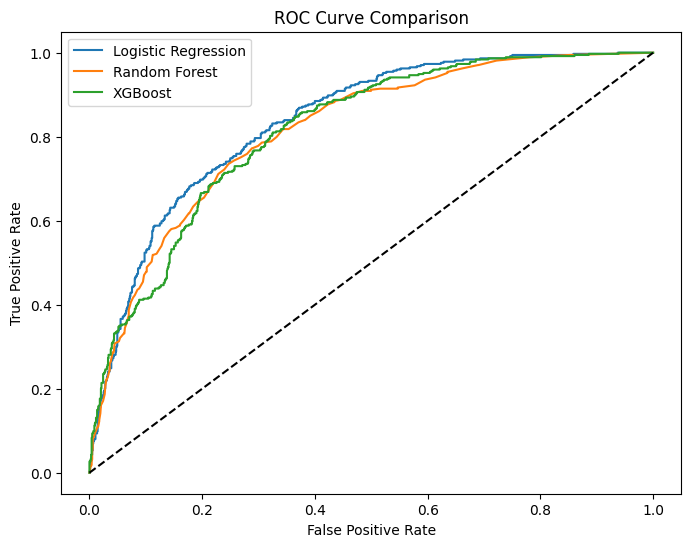

In [8]:
import matplotlib.pyplot as plt

lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

The ROC curve provides a visual comparison of the trade-off between true positive rate (sensitivity) and false positive rate across different thresholds for each model.

- **Logistic Regression** exhibits the strongest performance overall, with the highest true positive rate at most false positive rates, indicating better discriminatory power between churn and non-churn customers.

- **Random Forest** performs reasonably well but is slightly less effective than Logistic Regression, suggesting that it struggles more with borderline cases.

- **XGBoost** shows the lowest curve among the three models, highlighting that it has the weakest overall ability to separate the classes in this context.

AUC (Area Under the Curve) is not explicitly shown here but can be inferred from the curves. Logistic Regression would likely have the highest AUC score, followed by Random Forest and then XGBoost.

This analysis supports the earlier findings from the classification reports and further confirms that Logistic Regression might be the most promising baseline model for this problem. However, additional fine-tuning and techniques to improve churn recall should be explored in future modelling steps.

## Save feature columns

In [10]:
# Save feature columns used during training
feature_cols = X.columns.tolist()

import joblib
joblib.dump(feature_cols, '/Users/Cathaml/Desktop/feature_columns.pkl')
print("Feature columns saved to Desktop.")

Feature columns saved to Desktop.


## Save model

In [12]:
model_path = '/Users/Cathaml/Desktop/final_lr_model.pkl'
joblib.dump(lr, model_path)

print(f"Model saved to: {model_path}")

Model saved to: /Users/Cathaml/Desktop/final_lr_model.pkl


## Save scaler

In [13]:
joblib.dump(scaler, '/Users/Cathaml/Desktop/final_scaler.pkl')

['/Users/Cathaml/Desktop/final_scaler.pkl']

## ✅ Summary & Business Implications

In this project, we conducted a comprehensive end-to-end churn prediction analysis, covering data cleaning, exploratory data analysis (EDA), feature engineering, and multiple model comparisons. Our modelling phase included Logistic Regression, Random Forest, and XGBoost classifiers. Among them, Logistic Regression achieved the highest overall balance in precision and recall, while also demonstrating the strongest ROC curve performance.

### Key Takeaways

- The dataset was successfully pre-processed, with categorical variables properly encoded and numerical features standardised.
- Logistic Regression outperformed other models in terms of F1-score and ROC-AUC, suggesting it may provide a more reliable baseline for further iterations.
- Features such as tenure and monthly charges showed strong correlation with churn, offering important business insights.
- The class imbalance (fewer churners than non-churners) affected recall for the minority class, indicating further work could focus on techniques such as SMOTE or different class weighting to improve recall.

### Business Implications

- Improving churn prediction directly supports customer retention strategies, enabling targeted interventions for high-risk customers.
- Insights from feature importance can inform personalised engagement or tailored offers to reduce churn rates.
- A balanced approach focusing on both precision and recall ensures that interventions are cost-effective without generating too many false positives.

### Next Steps

- Perform hyperparameter tuning to further improve model performance and robustness.
- Explore feature importance to identify the most influential drivers of churn.
- Consider advanced ensemble methods or stacking for potential performance gains.
- Translate model outputs into actionable business strategies in collaboration with marketing and customer success teams..